# Import Module

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans  
#from data_utils import *
import jieba
import jieba.analyse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import codecs

## 1.Import Custom Terms & Stop Words

In [2]:
#载入自訂辭庫
jieba.load_userdict('data/SpecialWords.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\F78001\AppData\Local\Temp\jieba.cache
Loading model cost 0.825 seconds.
Prefix dict has been built succesfully.


In [3]:
#停止詞匯入一個數據組
stopwords = [line.strip() for line in codecs.open('data/stopwords.txt', 'r', 'utf-8').readlines()]
#载入停用词
jieba.analyse.set_stop_words('data/stopwords.txt')

# 2.Clear Punctuation

In [4]:
rows=pd.read_excel('data/Mail_Subject_ZH_EN.xlsx',header=0,encoding='utf-8',dtype=str)
Proj_list = rows.Mail_Subj_Txt.tolist()

In [6]:
Proj_ID = rows.Proj_Id.tolist()

中文文案

In [28]:
#去除特殊符號/英文/數字
import re

Trm_Subj_Nm = []

for i in Proj_list:
    Trm_Prj_Nm = re.sub(u"([^\u4e00-\u9fa5])","",i) #去除特殊符號/英文/數字
    Prj_Nm = re.sub(r'\d+', ' NUM ',Trm_Prj_Nm)
    #L_Prj_Nm = Prj_Nm.lower()
    Trm_Subj_Nm.append(Prj_Nm)

In [29]:
Trm_Subj_Nm_pd = pd.DataFrame(Trm_Subj_Nm)
np.shape(Trm_Subj_Nm)

(2366,)

In [30]:
export_csv = Trm_Subj_Nm_pd.to_csv (r'C:\Users\F78001\Desktop\Trm_Subj_Nm_ZH.csv', index = None, header=True)

英文文案

In [7]:
#去除特殊符號/中文/數字
import re

Trm_Prj_Nm_EN = []

for i in Proj_list:
    Trimmed_Proj_Nm = re.sub(u"([^\u0041-\u005a\u0061-\u007a])"," ",i) #去除特殊符號/中文/數字
    #Prj_Nm = re.sub(r'\d+', ' NUM ',Trm_Prj_Nm)
    L_Prj_Nm = Trimmed_Proj_Nm.lower()
    Trm_Prj_Nm_EN.append(L_Prj_Nm)

In [8]:
Trm_Prj_Nm_EN_pd = pd.DataFrame(Trm_Prj_Nm_EN)

In [9]:
export_csv = Trm_Prj_Nm_EN_pd.to_csv (r'C:\Users\F78001\Desktop\Trm_MailSubject_Nm_EN.csv', index = None, header=True)

# 3.Parsing

In [71]:
#结巴中文分词
segment_jieba = lambda text: " ".join(jieba.cut(text))

In [48]:
segment = lambda text: " ".join(text)

In [72]:
#1.加载语料
corpus = []
with open("data/Mail_Subj_Nm_EN_Recluster.txt","r") as f:
    for line in f:
        corpus.append(segment_jieba(line.strip())) # 去掉标点符号

In [65]:
#1.加载语料_去除StopWord
corpus_s = []
with open("data/Mail_Subj_Nm_EN_Recluster.txt","r") as f:
    for line in f:
        words = jieba.cut(line.strip())
        for word in words:
            if word not in stopwords:
                corpus_s.append(segment(words)) # 去掉标点符号

# 4.Words to Vectors & Clustering

In [74]:
#2.計算tf-idf設為權重
vectorizer = CountVectorizer()
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))
#使用fit_transform先擬合資料再標準化

In [75]:
#3.獲取詞袋模型中的所有詞語特徵如果特徵數量非常多的情況下可以按照權重降維
word = vectorizer.get_feature_names()
print("word feature length: {}".format(len(word))) #計算總共有N個重複詞組

word feature length: 608


In [76]:
#4.匯出權重，到這邊就實現了將文字向量化的過程，矩陣中的每一行就是一個文檔的向量表示
tfidf_weight = tfidf.toarray()

In [77]:
np.shape(tfidf_weight)

(425, 608)

In [78]:
#5.對向量進行聚類
# 指定分成N個類
kmeans = KMeans(n_clusters=7,max_iter=10000)
kmeans.fit(tfidf_weight)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [79]:
print("inertia: {}".format(kmeans.inertia_))

inertia: 347.1131100471121


In [80]:
# 列印出各個族的中心點
print(kmeans.cluster_centers_)
for index, label in enumerate(kmeans.labels_, 1): #使用enumerate針對字典中的字枚舉、列舉
    print("index: {}, label: {}".format(index, label))

[[ 1.18580841e-03  1.83569010e-03 -7.80625564e-18 ...  2.16357675e-03
   2.06273712e-03  2.66490029e-03]
 [-3.25260652e-19  0.00000000e+00  0.00000000e+00 ... -2.16840434e-19
   0.00000000e+00  6.50521303e-19]
 [-5.42101086e-19  4.33680869e-19  8.67361738e-19 ... -2.16840434e-19
  -2.16840434e-19  8.67361738e-19]
 ...
 [-2.16840434e-19 -2.16840434e-19  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  4.33680869e-19]
 [ 8.67361738e-19 -1.30104261e-18  1.00935510e-02 ...  1.30104261e-18
  -2.16840434e-18  4.33680869e-19]
 [-5.42101086e-19  4.33680869e-19  8.67361738e-19 ... -2.16840434e-19
  -2.16840434e-19  8.67361738e-19]]
index: 1, label: 5
index: 2, label: 5
index: 3, label: 0
index: 4, label: 0
index: 5, label: 0
index: 6, label: 0
index: 7, label: 0
index: 8, label: 0
index: 9, label: 0
index: 10, label: 1
index: 11, label: 1
index: 12, label: 1
index: 13, label: 1
index: 14, label: 1
index: 15, label: 1
index: 16, label: 1
index: 17, label: 1
index: 18, label: 1
index: 19, la

In [81]:
text_cluster = []

for index, label in enumerate(kmeans.labels_, 1):
    text_cluster.append("index: {}, label: {}".format(index, label))

In [82]:
# 樣本距其最近的聚類中心的平方距離之和，用來評判分類的準確度，值越小越好
# k-means的超參數n_clusters可以通過該值來評估
print("inertia: {}".format(kmeans.inertia_))

inertia: 347.1131100471121


# 5.Visualization

In [83]:
#將Label轉為文字
#label_str = kmeans.labels_.astype(str)
lab = kmeans.labels_.astype(int)

In [84]:
#6.視覺化
# 使用T-SNE演算法，對權重進行降維，準確度比PCA演算法高，但是耗時長
tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(tfidf_weight)

In [85]:
result = np.insert( decomposition_data , 0 ,values = lab ,axis=1)

In [86]:
np.shape(result)

(425, 3)

In [87]:
result[:5]

array([[  5.       ,   8.406439 ,   7.743995 ],
       [  5.       ,   8.406673 ,   7.7435627],
       [  0.       , -17.048145 , -12.493729 ],
       [  0.       , -22.681318 ,  -6.67453  ],
       [  0.       , -14.100124 ,  -7.8721156]], dtype=float32)

In [88]:
#將result表格中的欄位定義變數
cluster = result[:,0].astype(int)
a = result[:,1]
b = result[:,2]

In [89]:
#將result表格中的定義變數轉為DataFrame
PT = {
                "Cluster":cluster,
                "X":a,
                "Y":b
}
PT_pd = pd.DataFrame(PT)

In [90]:
np.shape(PT_pd)

(425, 3)

In [91]:
#切分各群集資料
C0=PT_pd[(PT_pd["Cluster"]==0)]
C1=PT_pd[(PT_pd["Cluster"]==1)]
C2=PT_pd[(PT_pd["Cluster"]==2)]
C3=PT_pd[(PT_pd["Cluster"]==3)]
C4=PT_pd[(PT_pd["Cluster"]==4)]
C5=PT_pd[(PT_pd["Cluster"]==5)]
C6=PT_pd[(PT_pd["Cluster"]==6)]
#C7=PT_pd[(PT_pd["Cluster"]==7)]
#C8=PT_pd[(PT_pd["Cluster"]==8)]
#C9=PT_pd[(PT_pd["Cluster"]==9)]
#C10=PT_pd[(PT_pd["Cluster"]==10)]
#C11=PT_pd[(PT_pd["Cluster"]==11)]
#C12=PT_pd[(PT_pd["Cluster"]==12)]
#C13=PT_pd[(PT_pd["Cluster"]==13)]
#C14=PT_pd[(PT_pd["Cluster"]==14)]
#C15=PT_pd[(PT_pd["Cluster"]==15)]

In [92]:
C6[:5]

,Cluster,X,Y
78,6,-2.920037,-14.620411
79,6,-2.915161,-14.625137
80,6,-9.107885,13.355725
94,6,3.408316,-10.644837
166,6,2.999347,-10.239684


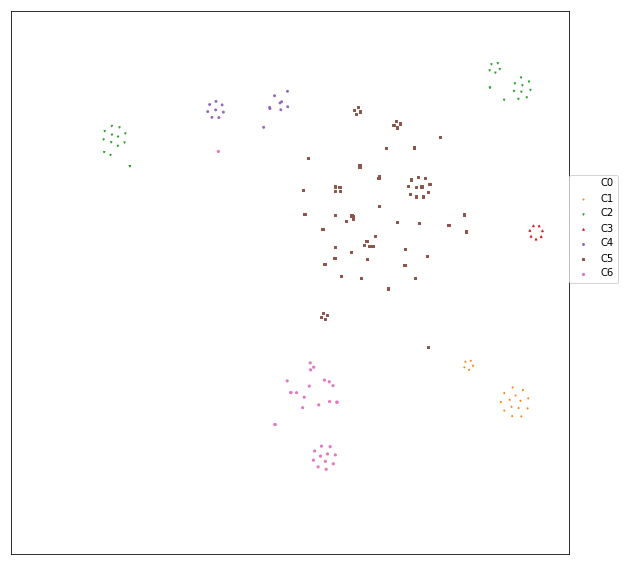

In [93]:
#將各群集2維資料畫進散步圖
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

plt.scatter(C0['X'],C0['Y'], C0['Cluster'] , marker=".",label="C0")
plt.scatter(C1['X'],C1['Y'], C1['Cluster'] , marker="o",label="C1")
plt.scatter(C2['X'],C2['Y'], C2['Cluster'] , marker="v",label="C2")
plt.scatter(C3['X'],C3['Y'], C3['Cluster'] , marker="^",label="C3")
plt.scatter(C4['X'],C4['Y'], C4['Cluster'] , marker="8",label="C4")
plt.scatter(C5['X'],C5['Y'], C5['Cluster'] , marker="s",label="C5")
plt.scatter(C6['X'],C6['Y'], C6['Cluster'] , marker="p",label="C6")
#plt.scatter(C7['X'],C7['Y'], C7['Cluster'] , marker="*",label="C7")
#plt.scatter(C8['X'],C8['Y'], C8['Cluster'] , marker="+",label="C8")
#plt.scatter(C9['X'],C9['Y'], C9['Cluster'] , marker="D",label="C9")
#plt.scatter(C10['X'],C10['Y'], C10['Cluster'] , marker="x",label="C10")
#plt.scatter(C11['X'],C11['Y'], C11['Cluster'] , marker="H",label="C11")
#plt.scatter(C12['X'],C12['Y'], C12['Cluster'] , marker="<",label="C12")
#plt.scatter(C13['X'],C13['Y'], C13['Cluster'] , marker=">",label="C13")
#plt.scatter(C14['X'],C14['Y'], C14['Cluster'] , marker="1",label="C14")
#plt.scatter(C15['X'],C15['Y'], C15['Cluster'] , marker="2",label="C15")

# 設置坐標軸的取值範圍
#plt.xlim((-100, 100))
#plt.ylim((-100, 100))

#設置坐標軸刻度
plt.xticks(())
plt.yticks(())

#设置图例
plt.legend(loc=(1, 0.5))

# plt.show()
#plt.savefig('./_ZH.png', aspect=1)

# 6.Reprocess & Output

In [94]:
Trimmed_Proj_Nm = np.array(corpus).reshape(-1)
Label = kmeans.labels_.astype(int).tolist()

In [95]:
Result_Table = {
                "Trimmed_Proj_Nm":Trimmed_Proj_Nm,
                "Label":Label
}

In [96]:
text_cluster_df = pd.DataFrame(Result_Table)

In [97]:
text_cluster_df[:5]

,Label,Trimmed_Proj_Nm
0,5,s earn x bonus miles with hilton ...
1,5,s earn x bonus miles with hilton ...
2,0,die neue internetseite von ist online
3,0,notice of modified taoyuan internation...
4,0,promotion vers bangkok hong kong et ...


In [98]:
export_csv = text_cluster_df.to_csv (r'C:\Users\F78001\Desktop\Subj_ReCluster2_EN_K7.csv', index = None, header=True)

Filter for re-clusterting

In [302]:
L0= text_cluster_df[(text_cluster_df["Label"]==0)]
L1=text_cluster_df[(text_cluster_df["Label"]==1)]
L3=text_cluster_df[(text_cluster_df["Label"]==3)]
L4=text_cluster_df[(text_cluster_df["Label"]==4)]
L5=text_cluster_df[(text_cluster_df["Label"]==5)]
#L6=text_cluster_df[(text_cluster_df["Label"]==6)]
L7=text_cluster_df[(text_cluster_df["Label"]==7)]
#L8=text_cluster_df[(text_cluster_df["Label"]==8)]
L9=text_cluster_df[(text_cluster_df["Label"]==9)]
L10=text_cluster_df[(text_cluster_df["Label"]==10)]
L11=text_cluster_df[(text_cluster_df["Label"]==11)]

In [303]:
R1 = L0.append(L1)
R2 = R1.append(L3)
R3 = R2.append(L4)
R4 = R3.append(L5)
R5 = R4.append(L7)
R6 = R5.append(L9)
R7 = R6.append(L10)
recluster = R7.append(L11)

In [304]:
recluster = recluster.reindex(columns=['Label','Trimmed_Proj_Nm'])

In [305]:
recluster[:5]

,Label,Trimmed_Proj_Nm
320,0,連續 三年 獲 五星級 航空 榮譽並 奪得 全球 十大 最佳 航空公司 第五名 全球 最佳 ...
321,0,連續 三年 獲 五星級 航空 榮譽並 奪得 全球 十大 最佳 航空公司 第五名 全球 最佳 ...
322,0,連續 三年 獲 五星級 航空 榮譽並 奪得 全球 十大 最佳 航空公司 第五名 全球 最佳 ...
323,0,連續 三年 獲 五星級 航空 榮譽並 奪得 全球 十大 最佳 航空公司 第五名 全球 最佳 ...
814,0,歡迎 登機 快樂 一起 飛 彩繪機 換新裝 慶祝 活動


In [306]:
export_csv = recluster.to_csv (r'C:\Users\F78001\Desktop\Subj_ReCluster2_ZH.csv', index = None, header=True)

# Note

In [ ]:
#只除特殊符號/取代數字為NUM
import re

Trm_Prj_Nm = []

for i in Proj_Nm:
    Trm_Prj_Nm = re.sub(u"([^\u4e00-\u9fa5\u0030-\u0039\u0041-\u005a\u0061-\u007a])"," ",i) #去除符號
    Prj_Nm = re.sub(r'\d+', ' NUM ',Trm_Prj_Nm)
    L_Prj_Nm = Prj_Nm.lower()
    Trm_Prj_Nm.append(L_Prj_Nm)

In [ ]:
#DataFrame使用函數要改為apply.(自訂函數)
def cutword(x):
        seg = jieba.cut(x)  #结巴分词函数
        return ' '.join(seg)#
df['seg_word']=df['title'].apply(cutword)

In [154]:
def custom_jieba(text):
    seg = jieba.cut(text)  #结巴分词函數
    #for word in seg:
    if seg not in stopwords:
        return " ".join(seg)

In [157]:
#1.加载语料TEST
corpus_t = []
with open("data/Proj_Nm_ZH.txt","r") as f:
    for line in f:
        # 去掉标点符号
        corpus_t.append(custom_jieba(line.strip()))

In [15]:
def custom_jieba_2(text):
    #seg = []
    for index, row in text.iterrows():
        content = row[1] #針對第2欄抽詞斷字
        words = jieba.cut(content)
        for word in words:
            if word not in stopwords:
                #sent = ' '.join(words)
                #sent_list = sent.append(sent)
                return  ' '.join(word)#sent_list

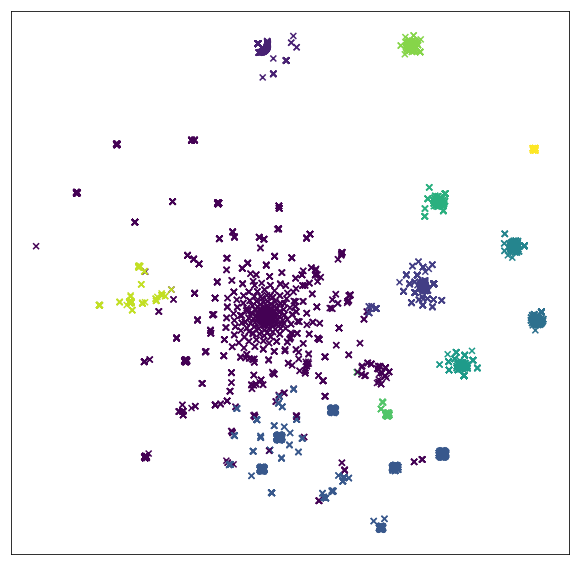

In [75]:
#6、可视化

# 使用T-SNE算法，对权重进行降维，准确度比PCA算法高，但是耗时长
tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(tfidf_weight)

x = []
y = []

for i in decomposition_data:
    x.append(i[0])
    y.append(i[1])

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

plt.scatter(x, y, c=kmeans.labels_, marker="x")

# 設置坐標軸的取值範圍
#plt.xlim((-100, 100))
#plt.ylim((-100, 100))

plt.xticks(())
plt.yticks(())
# plt.show()
plt.savefig('./sample.png', aspect=1)

In [ ]:
#使用DataFrame的欄位切詞
#dataframe.coulumn.apply(user define function)

In [ ]:
#2019/07/18
#修正1: 去除NUM/test/測試 英文分開分析?
#修正2: 自訂函數去除Stop Words & 加入User Dictionary
#修正3: 地區字? 
#把確定的分群排除在分群